In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
%config IPCompleter.greedy=True

In [3]:
# Importing important libararies i.e Numpy, Pandas, Matplotlib, Seaborn

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
#from pylab import rcParams 
import pyforest
from functools import reduce
#import datetime as dt
#%matplotlib inline

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
pd.set_option('display.max_columns',50 )
pd.set_option('display.max_rows', 500)

In [8]:
cars = pd.read_csv('/Users/vinitdawane/Desktop/My Resources/My Analysis/CO2 Emmission_MLR/FuelConsumptionCo2.csv')

In [9]:
# Getting to know more about the data i.e. Size, Columns, Rows, Presence of NA Values etc

print(cars.ndim)              
print('\n')
print(cars.shape)
print('\n')
print(cars.size)
print('\n')
print(cars.info())
print('\n')
print(cars.dtypes.value_counts())
print('\n')

2


(1067, 13)


13871


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
mem

In [11]:
# Getting the Sample of the data through first n rows

cars.head(n = 10) # Default 5 rows, change value of n to change sample

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [12]:
# Getting the Statistical summary of the data

cars.describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.99])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
5%,2014.0,1.600000,4.000000,8.100000,6.100000,7.230000,16.000000,168.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
95%,2014.0,6.000000,8.000000,21.100000,14.600000,18.000000,39.000000,380.000000
99%,2014.0,6.534000,12.000000,25.300000,19.234000,22.236000,47.000000,415.700000


In [13]:
# Finding the Correlation between the variables
cars.corr = cars.corr()
cars.corr.style.background_gradient()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,nan,nan,nan,nan,nan,nan,nan,nan
ENGINESIZE,nan,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,nan,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,nan,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,nan,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,nan,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,nan,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,nan,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


- No Null values in the data

- No Outliers/Extreme Values

- Strong correlation between numerical variables

In [18]:
cars

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Data Exploration

In [14]:
cars.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
# Checking categorical variables

In [16]:
cars['MAKE'].nunique()

39

In [17]:
cars['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [18]:
cars['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
TOYOTA           49
AUDI             49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [19]:
cars['MODEL'].nunique()

663

In [20]:
cars['MODEL'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [21]:
cars['MODEL'].value_counts()

F150 FFV 4X4            8
F150 FFV                8
BEETLE                  6
FOCUS FFV               6
ACCORD                  6
                       ..
300 AWD                 1
MUSTANG CONVERTIBLE     1
F-TYPE S CONVERTIBLE    1
TT ROADSTER QUATTRO     1
Q7                      1
Name: MODEL, Length: 663, dtype: int64

In [22]:
cars['VEHICLECLASS'].nunique()

16

In [23]:
cars['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [24]:
cars['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [25]:
cars.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [27]:
## Using Pairplots to check correlations in the data

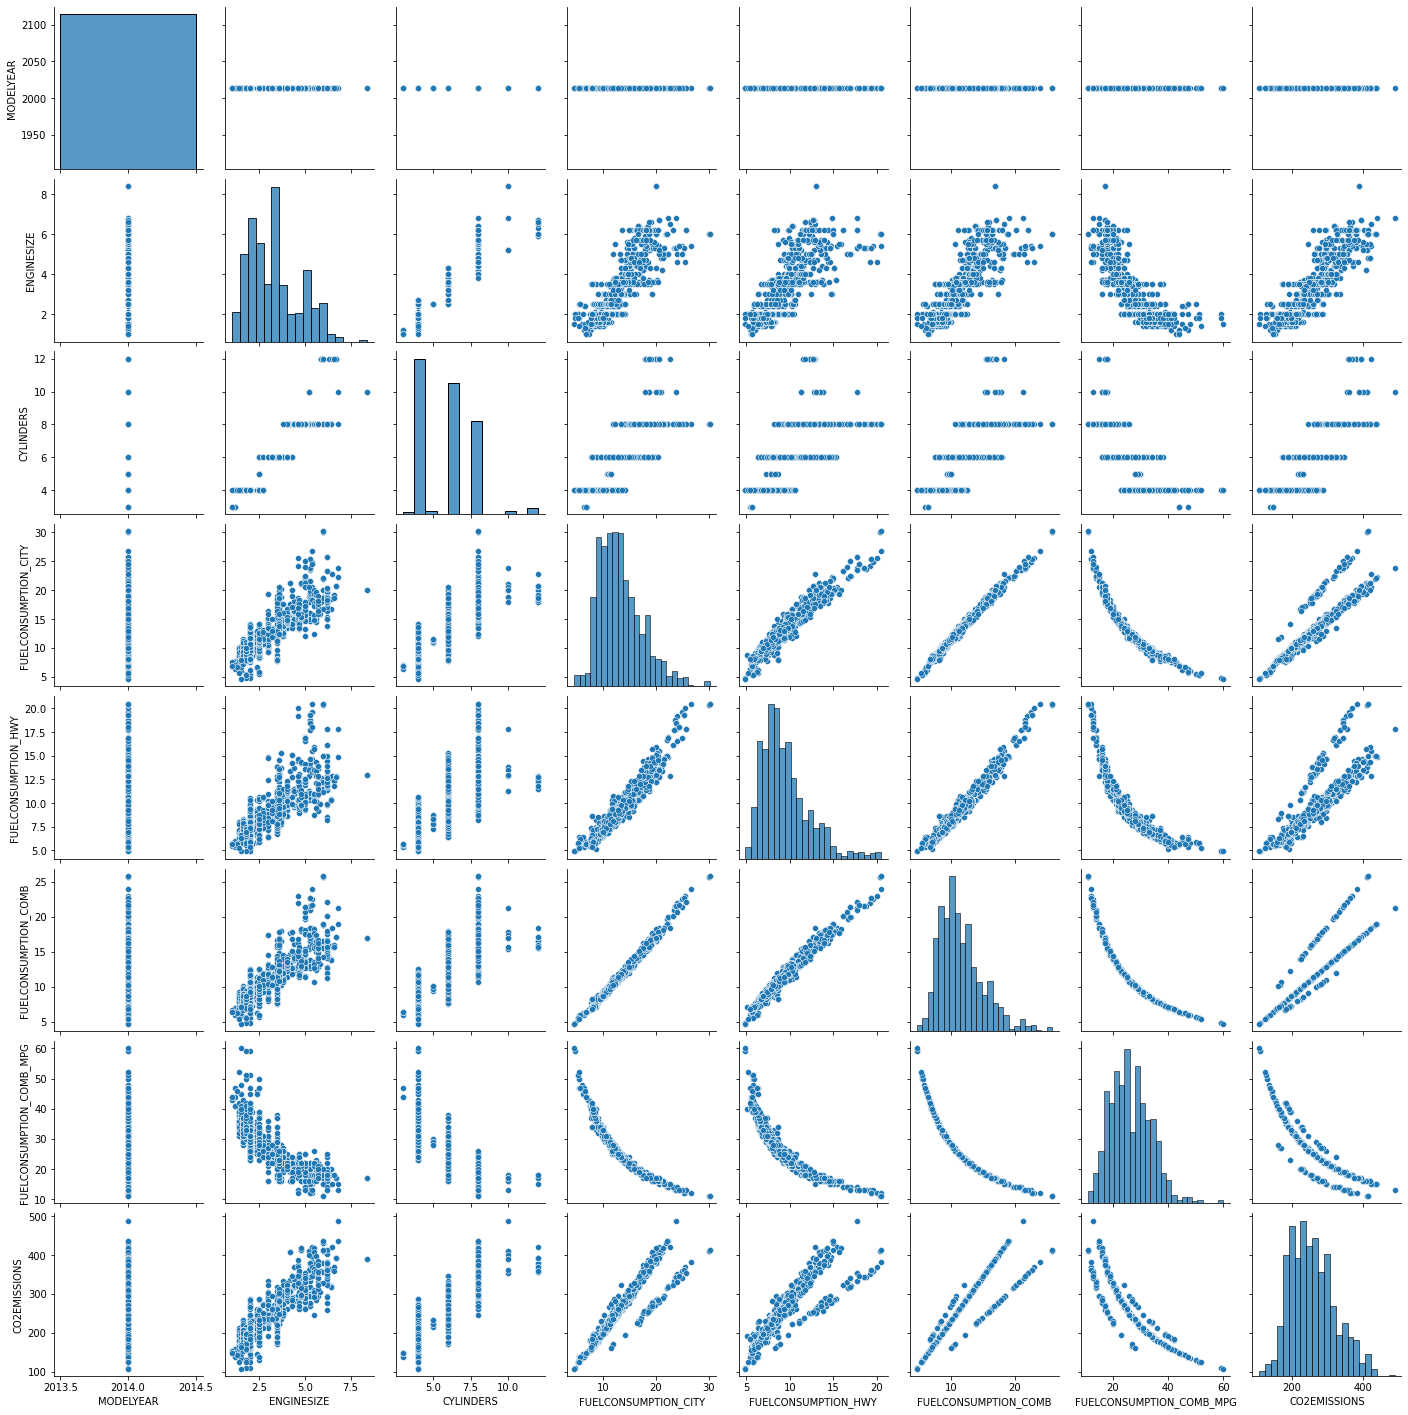

In [26]:
sns.pairplot(cars, kind='scatter')

plt.show()


- CO2 Emissions does correlate with Engine Size, Cylinders, Fuel Consumption etc

In [28]:
# Using Boxplots against categorical variables vs CO2 emission

<Figure size 2880x1728 with 0 Axes>

<AxesSubplot:xlabel='MAKE', ylabel='CO2EMISSIONS'>

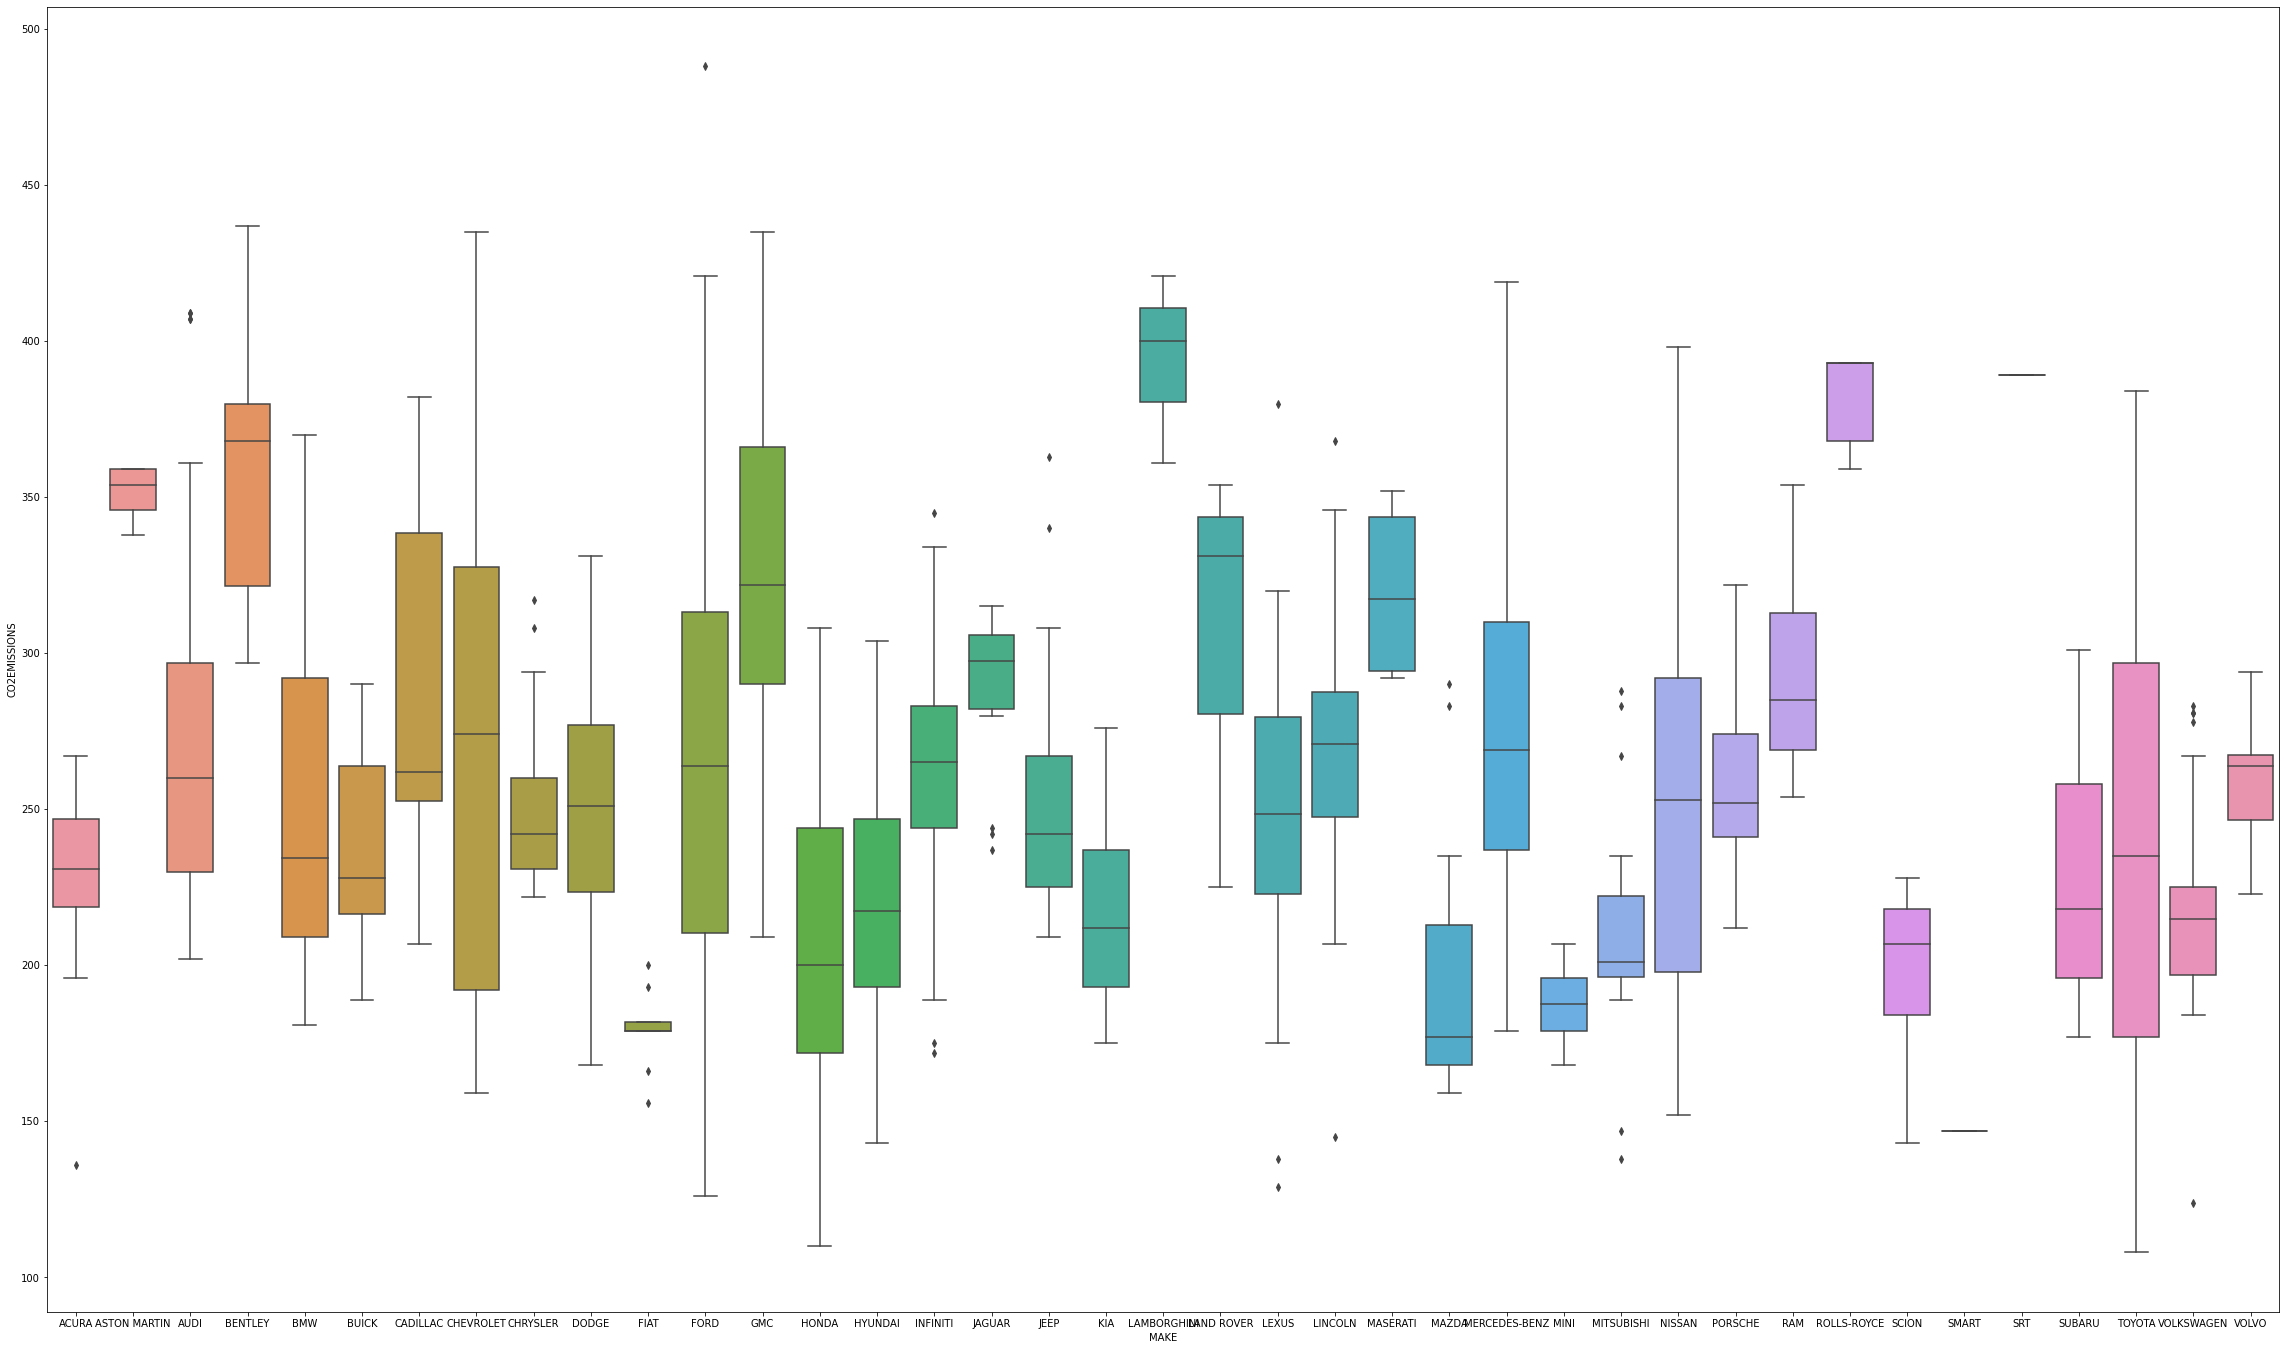

In [29]:
# MAKE vs EMISSION
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'MAKE', y = 'CO2EMISSIONS', data = cars)
plt.show()

<Figure size 2880x1728 with 0 Axes>

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='CO2EMISSIONS'>

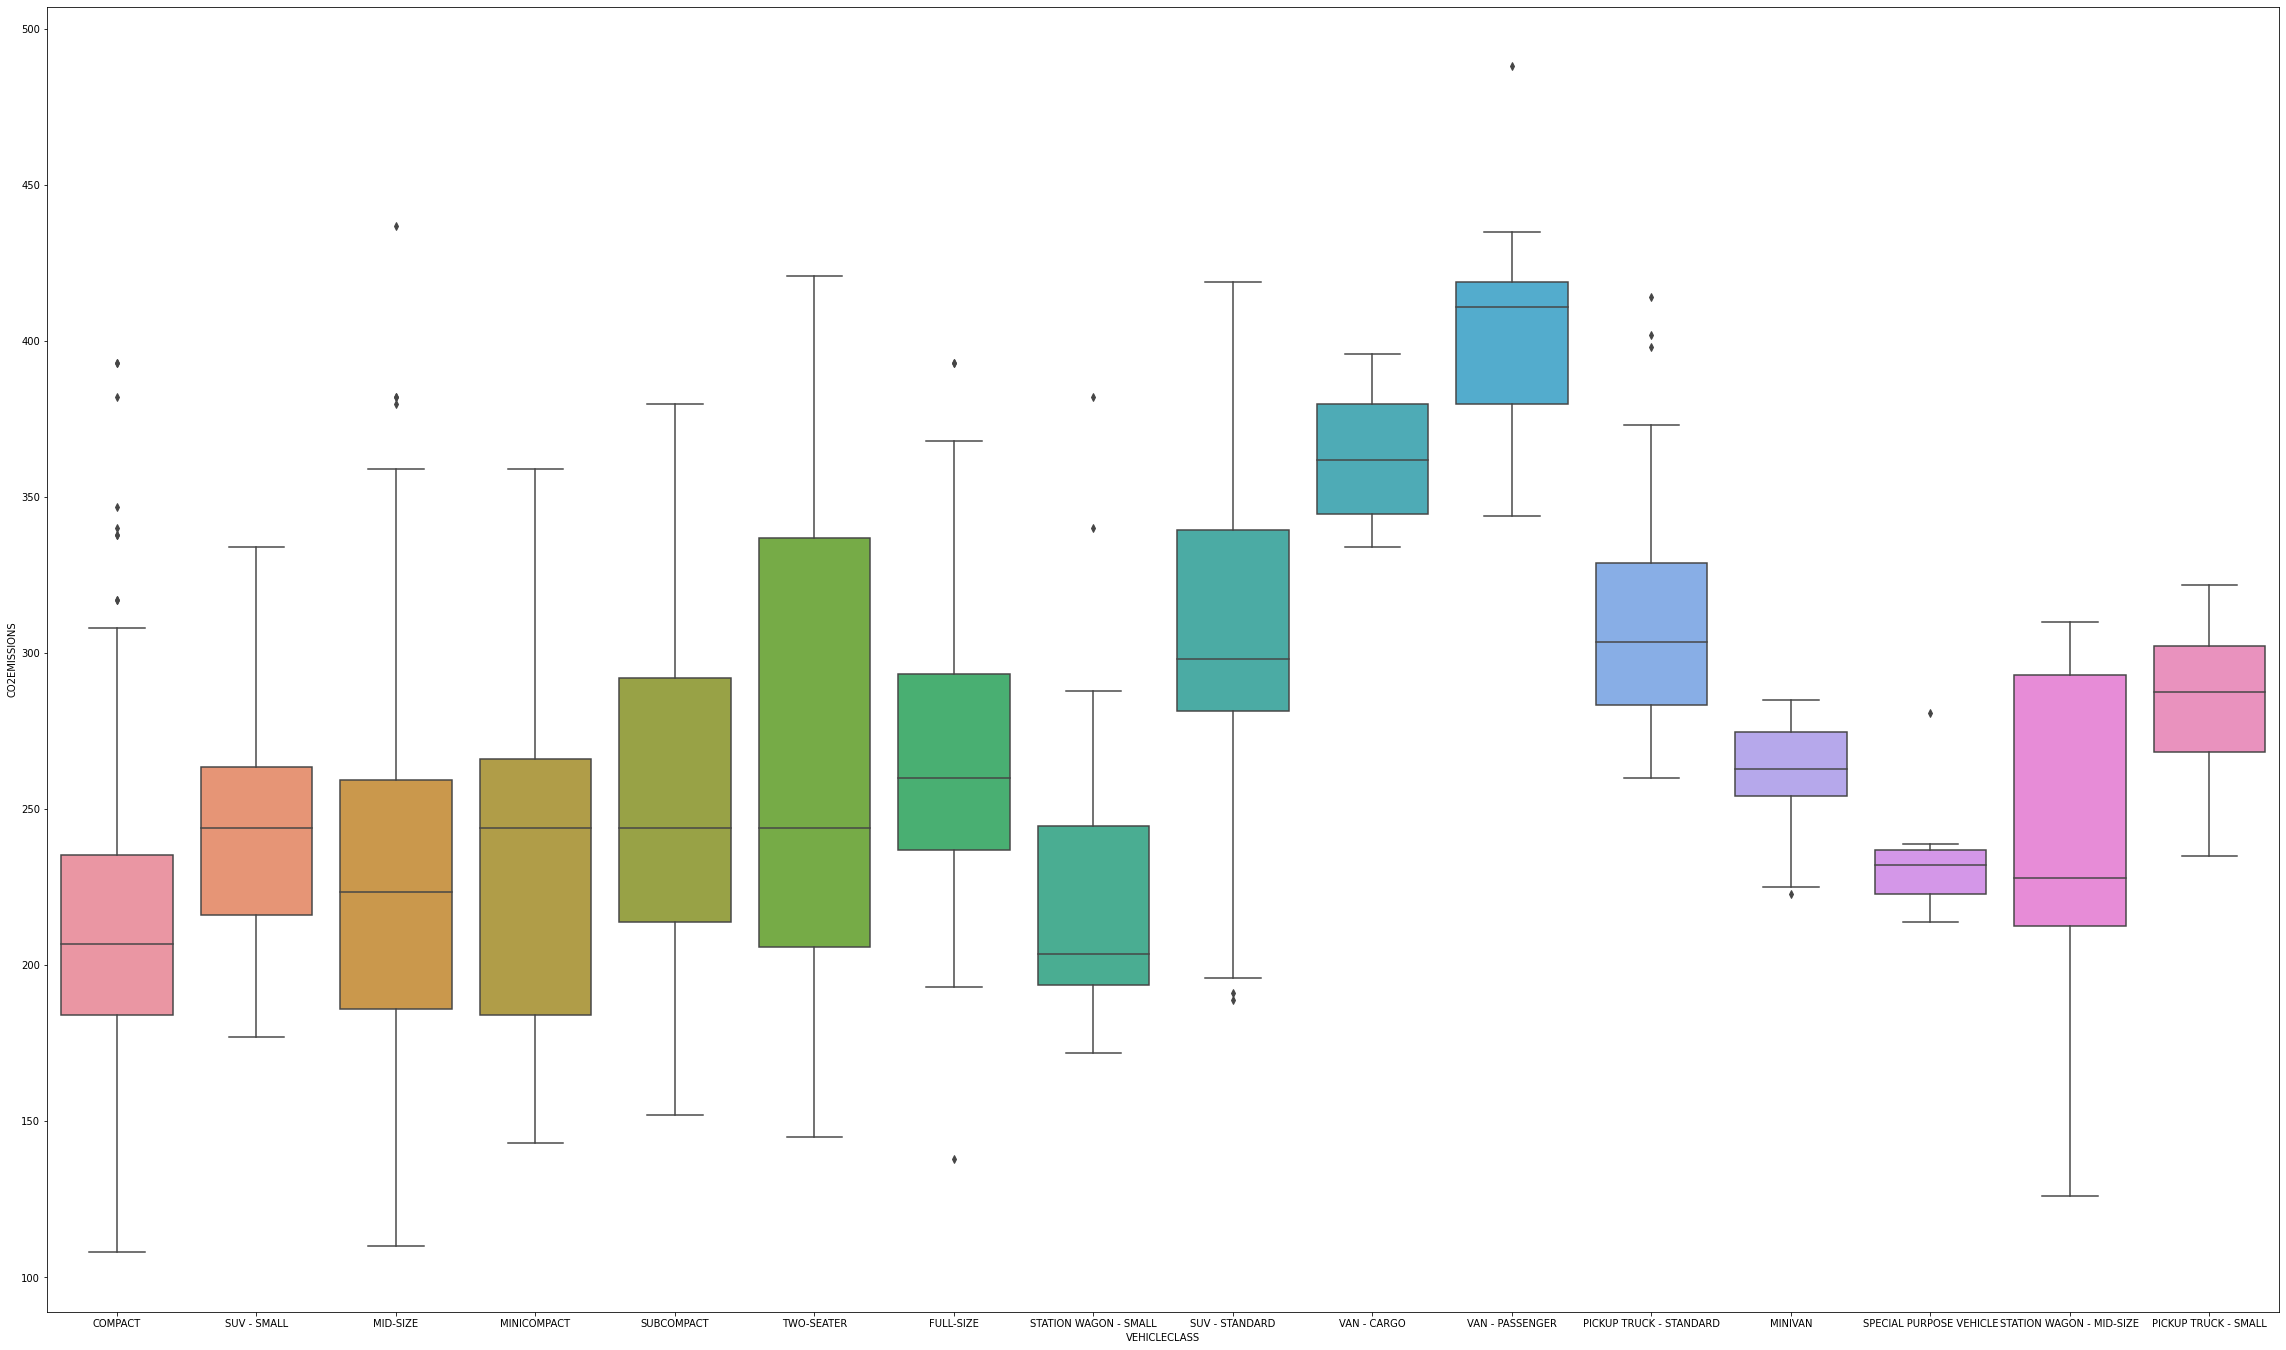

In [31]:
# CLASS vs EMISSION

plt.figure(figsize=(40, 24))
sns.boxplot(x = 'VEHICLECLASS', y = 'CO2EMISSIONS', data = cars)
plt.show()

<Figure size 2880x1728 with 0 Axes>

<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

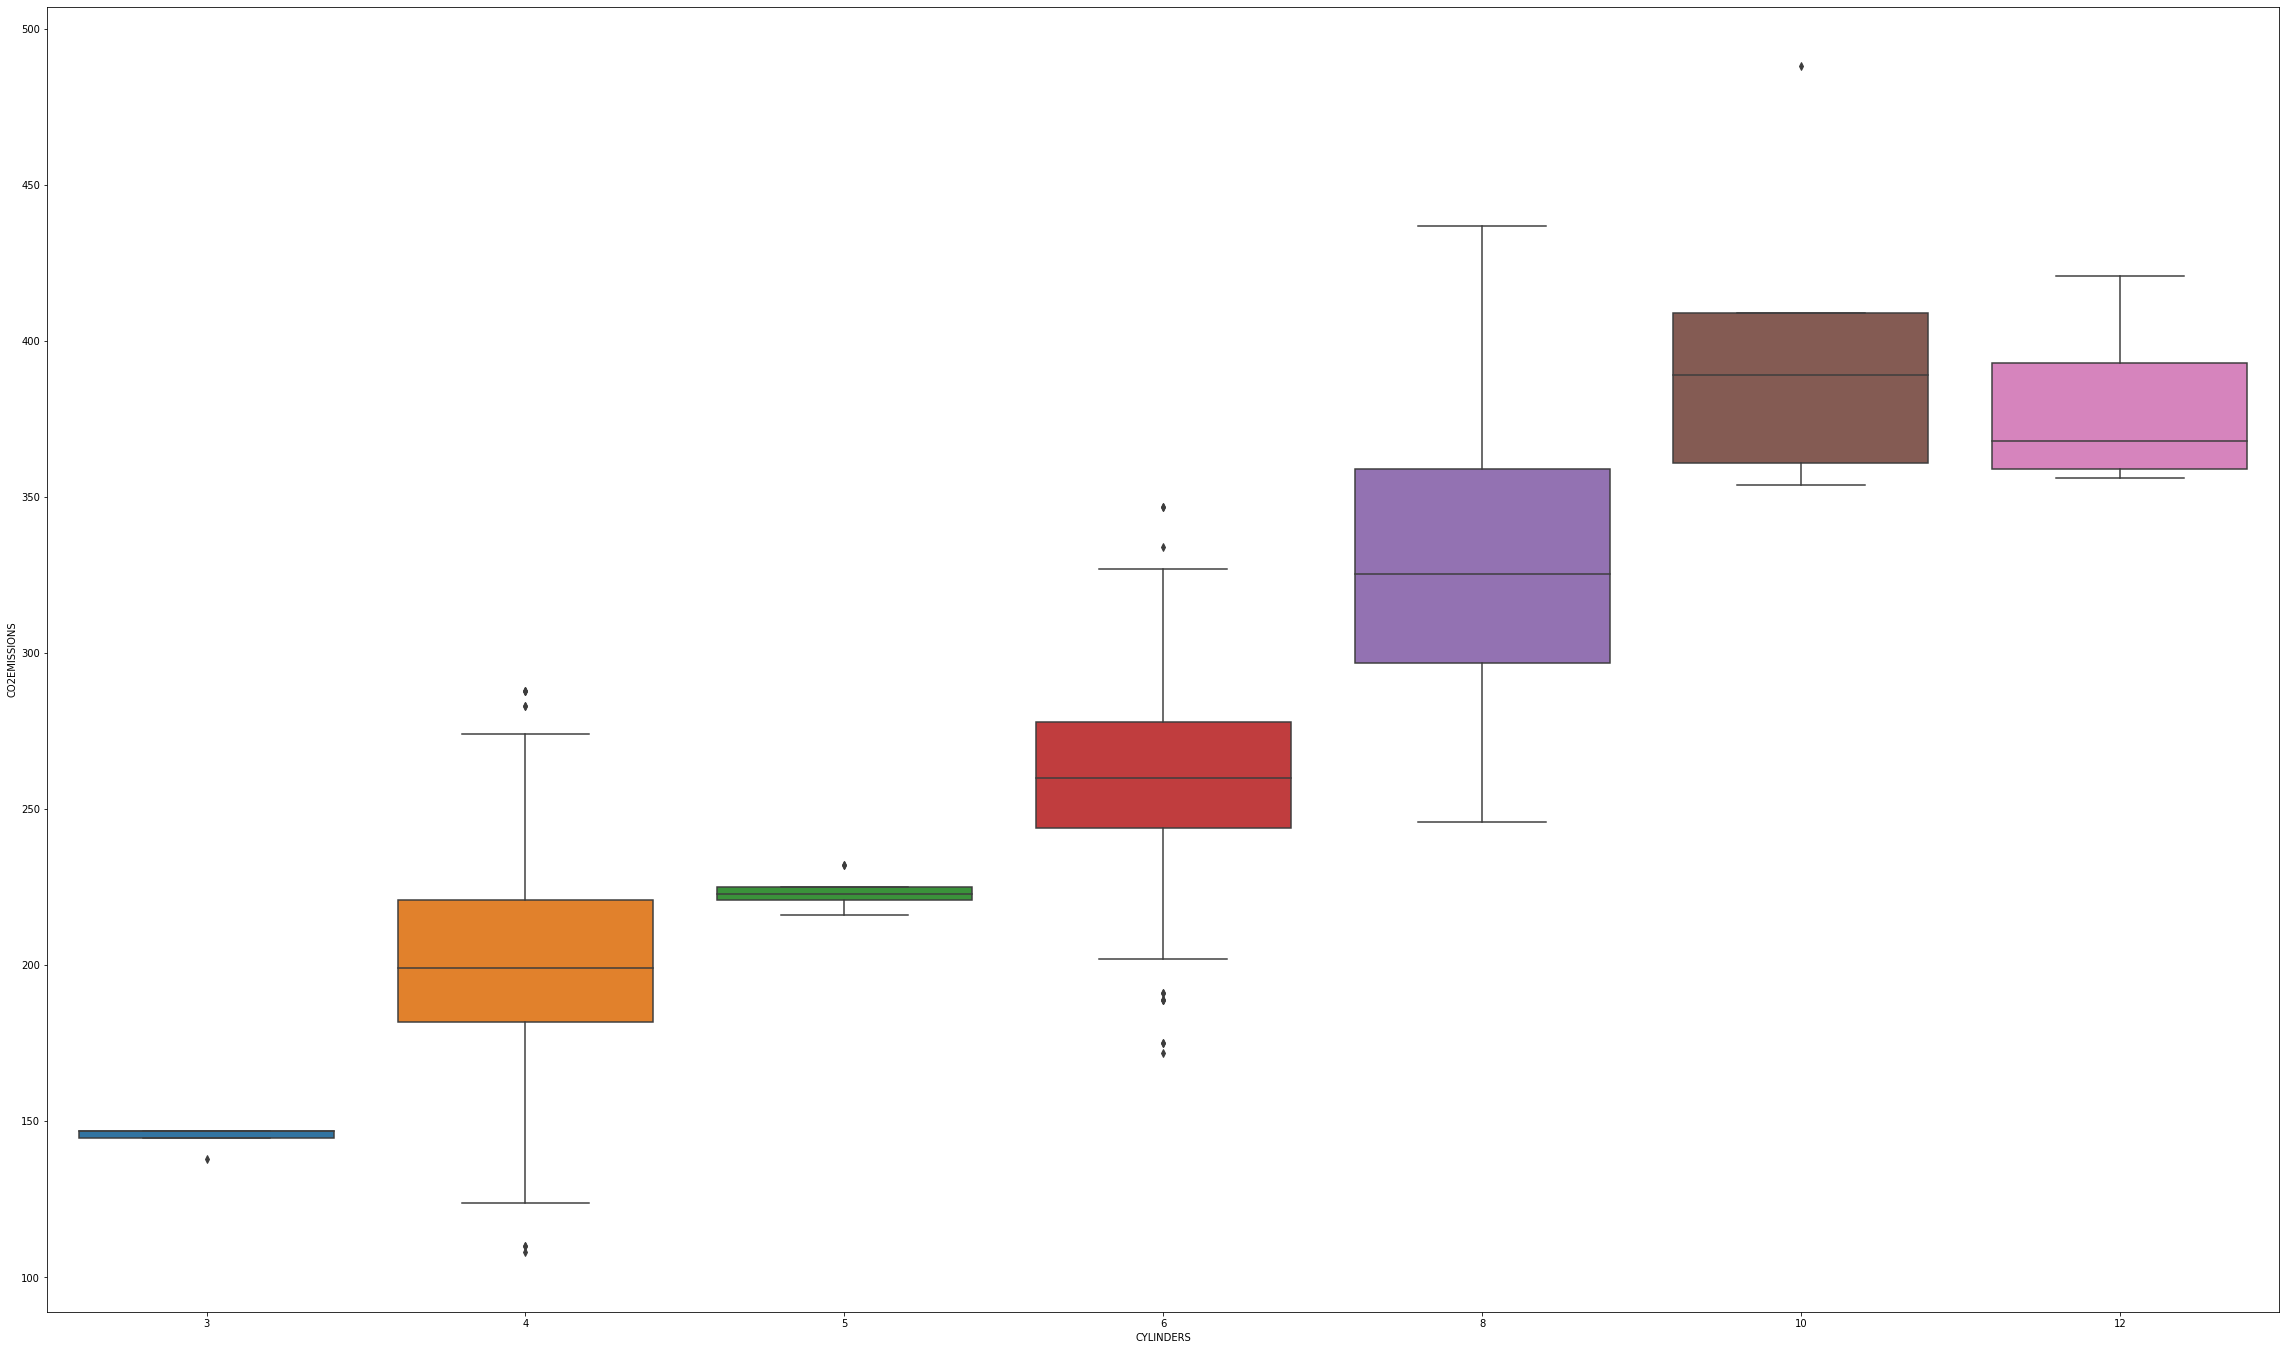

In [32]:
# CYLINDERS VS EMISSIONS

plt.figure(figsize=(40, 24))
sns.boxplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = cars)
plt.show()

<Figure size 2880x1728 with 0 Axes>

<AxesSubplot:xlabel='FUELTYPE', ylabel='CO2EMISSIONS'>

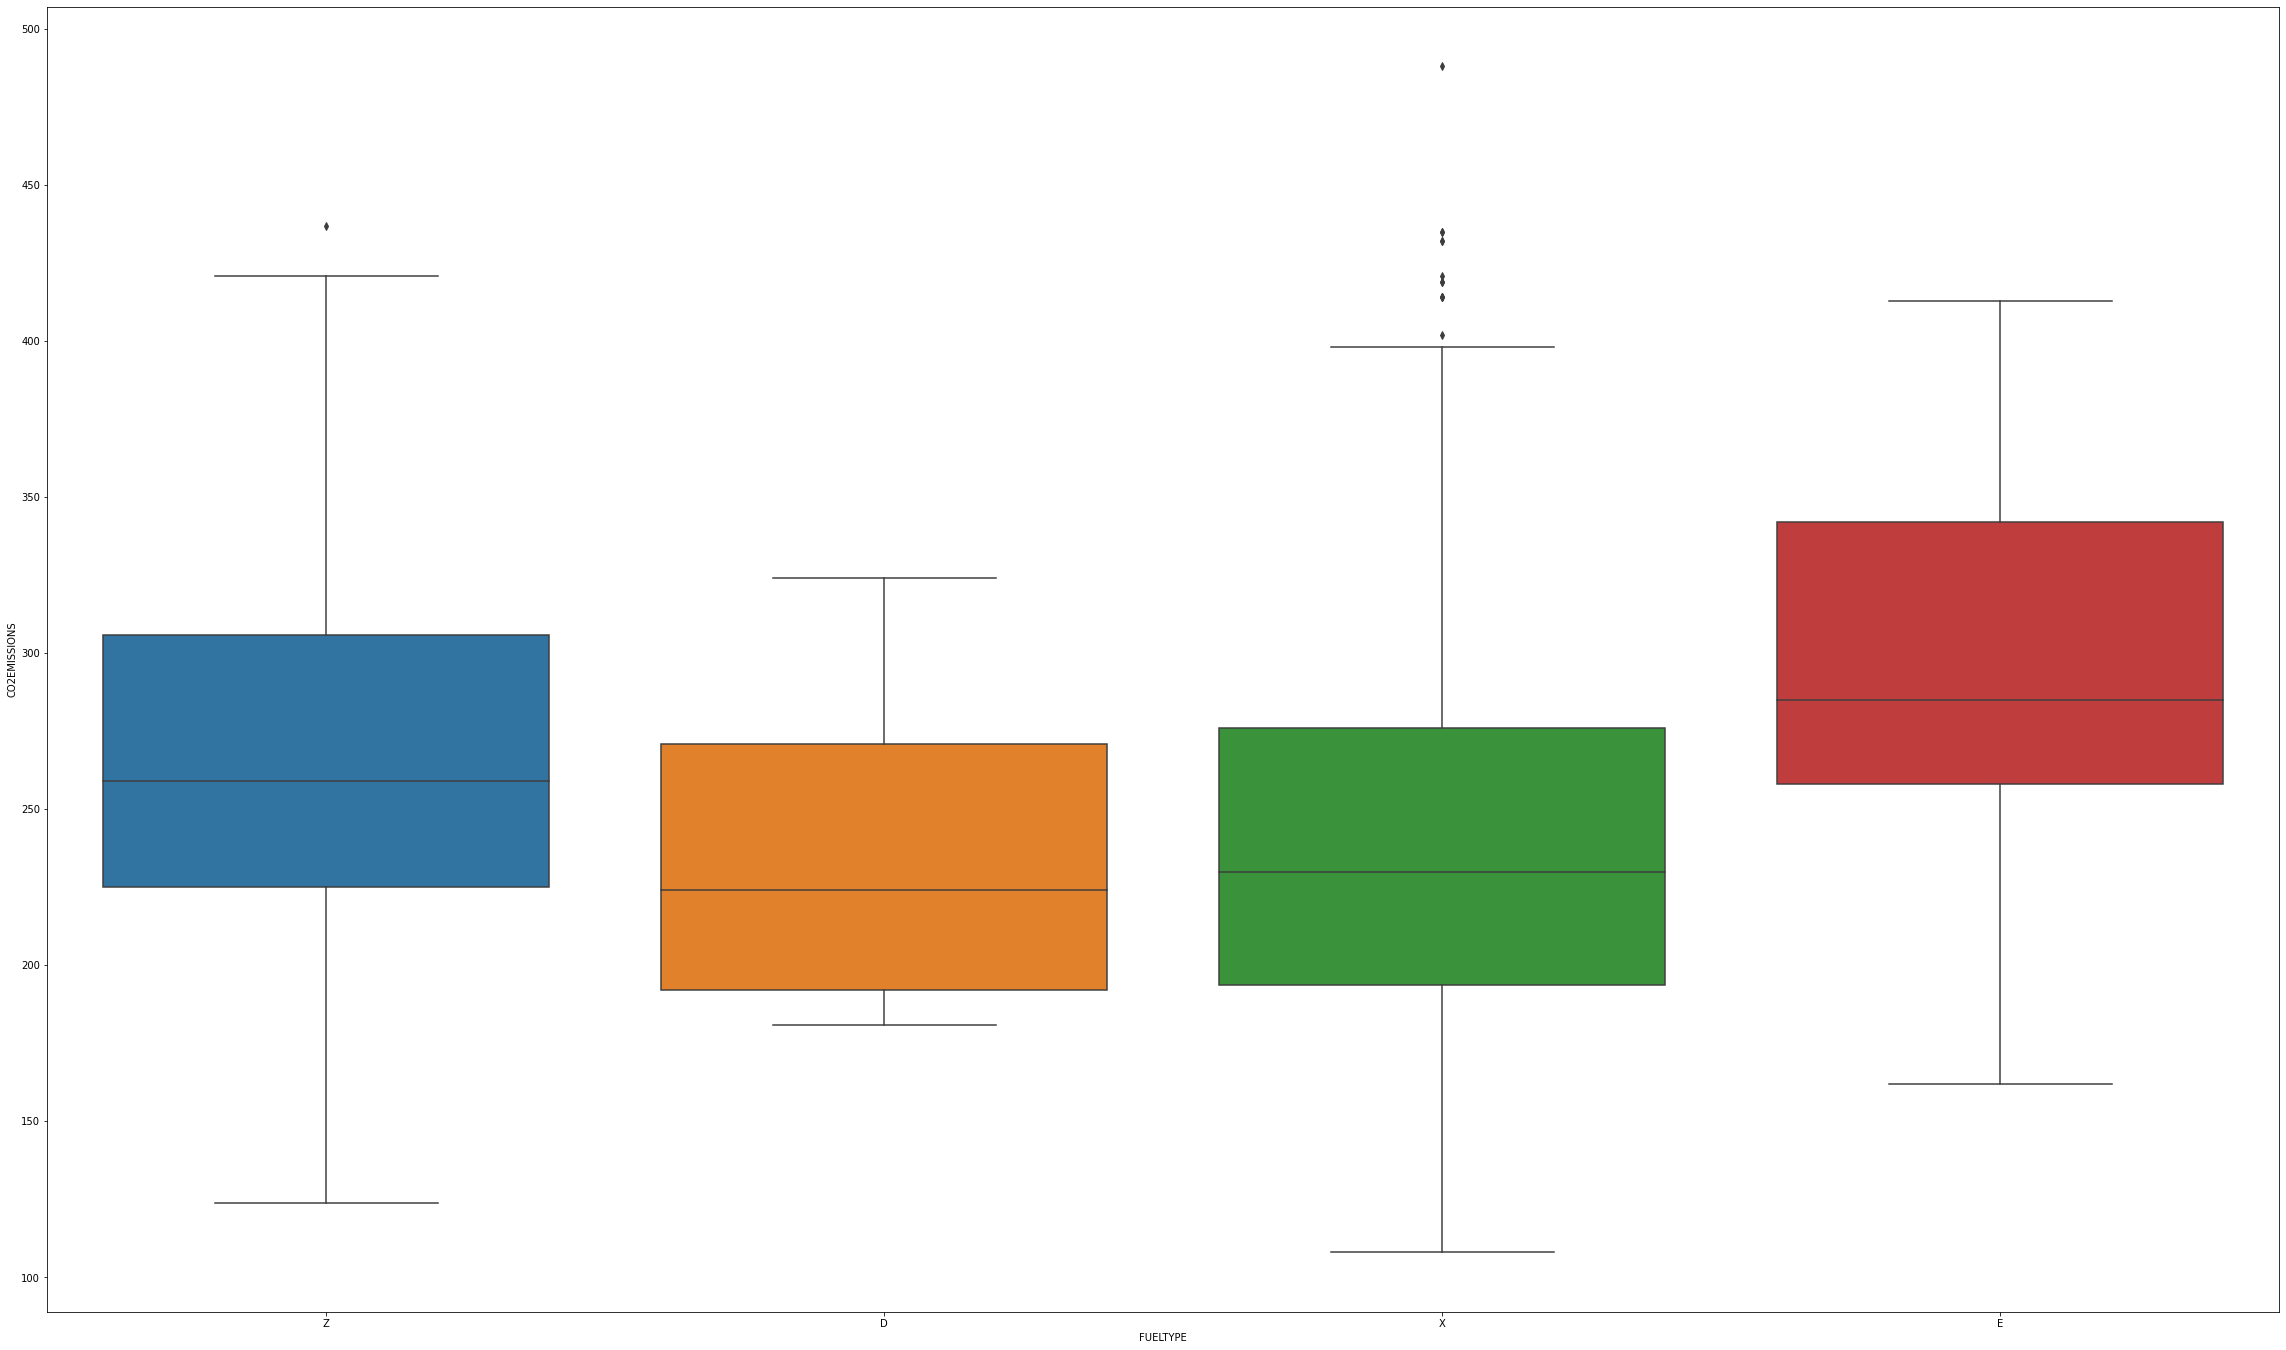

In [33]:
# FUELTYPE VS EMISSION

plt.figure(figsize=(40, 24))
sns.boxplot(x = 'FUELTYPE', y = 'CO2EMISSIONS', data = cars)
plt.show()

<Figure size 2880x1728 with 0 Axes>

<AxesSubplot:xlabel='TRANSMISSION', ylabel='CO2EMISSIONS'>

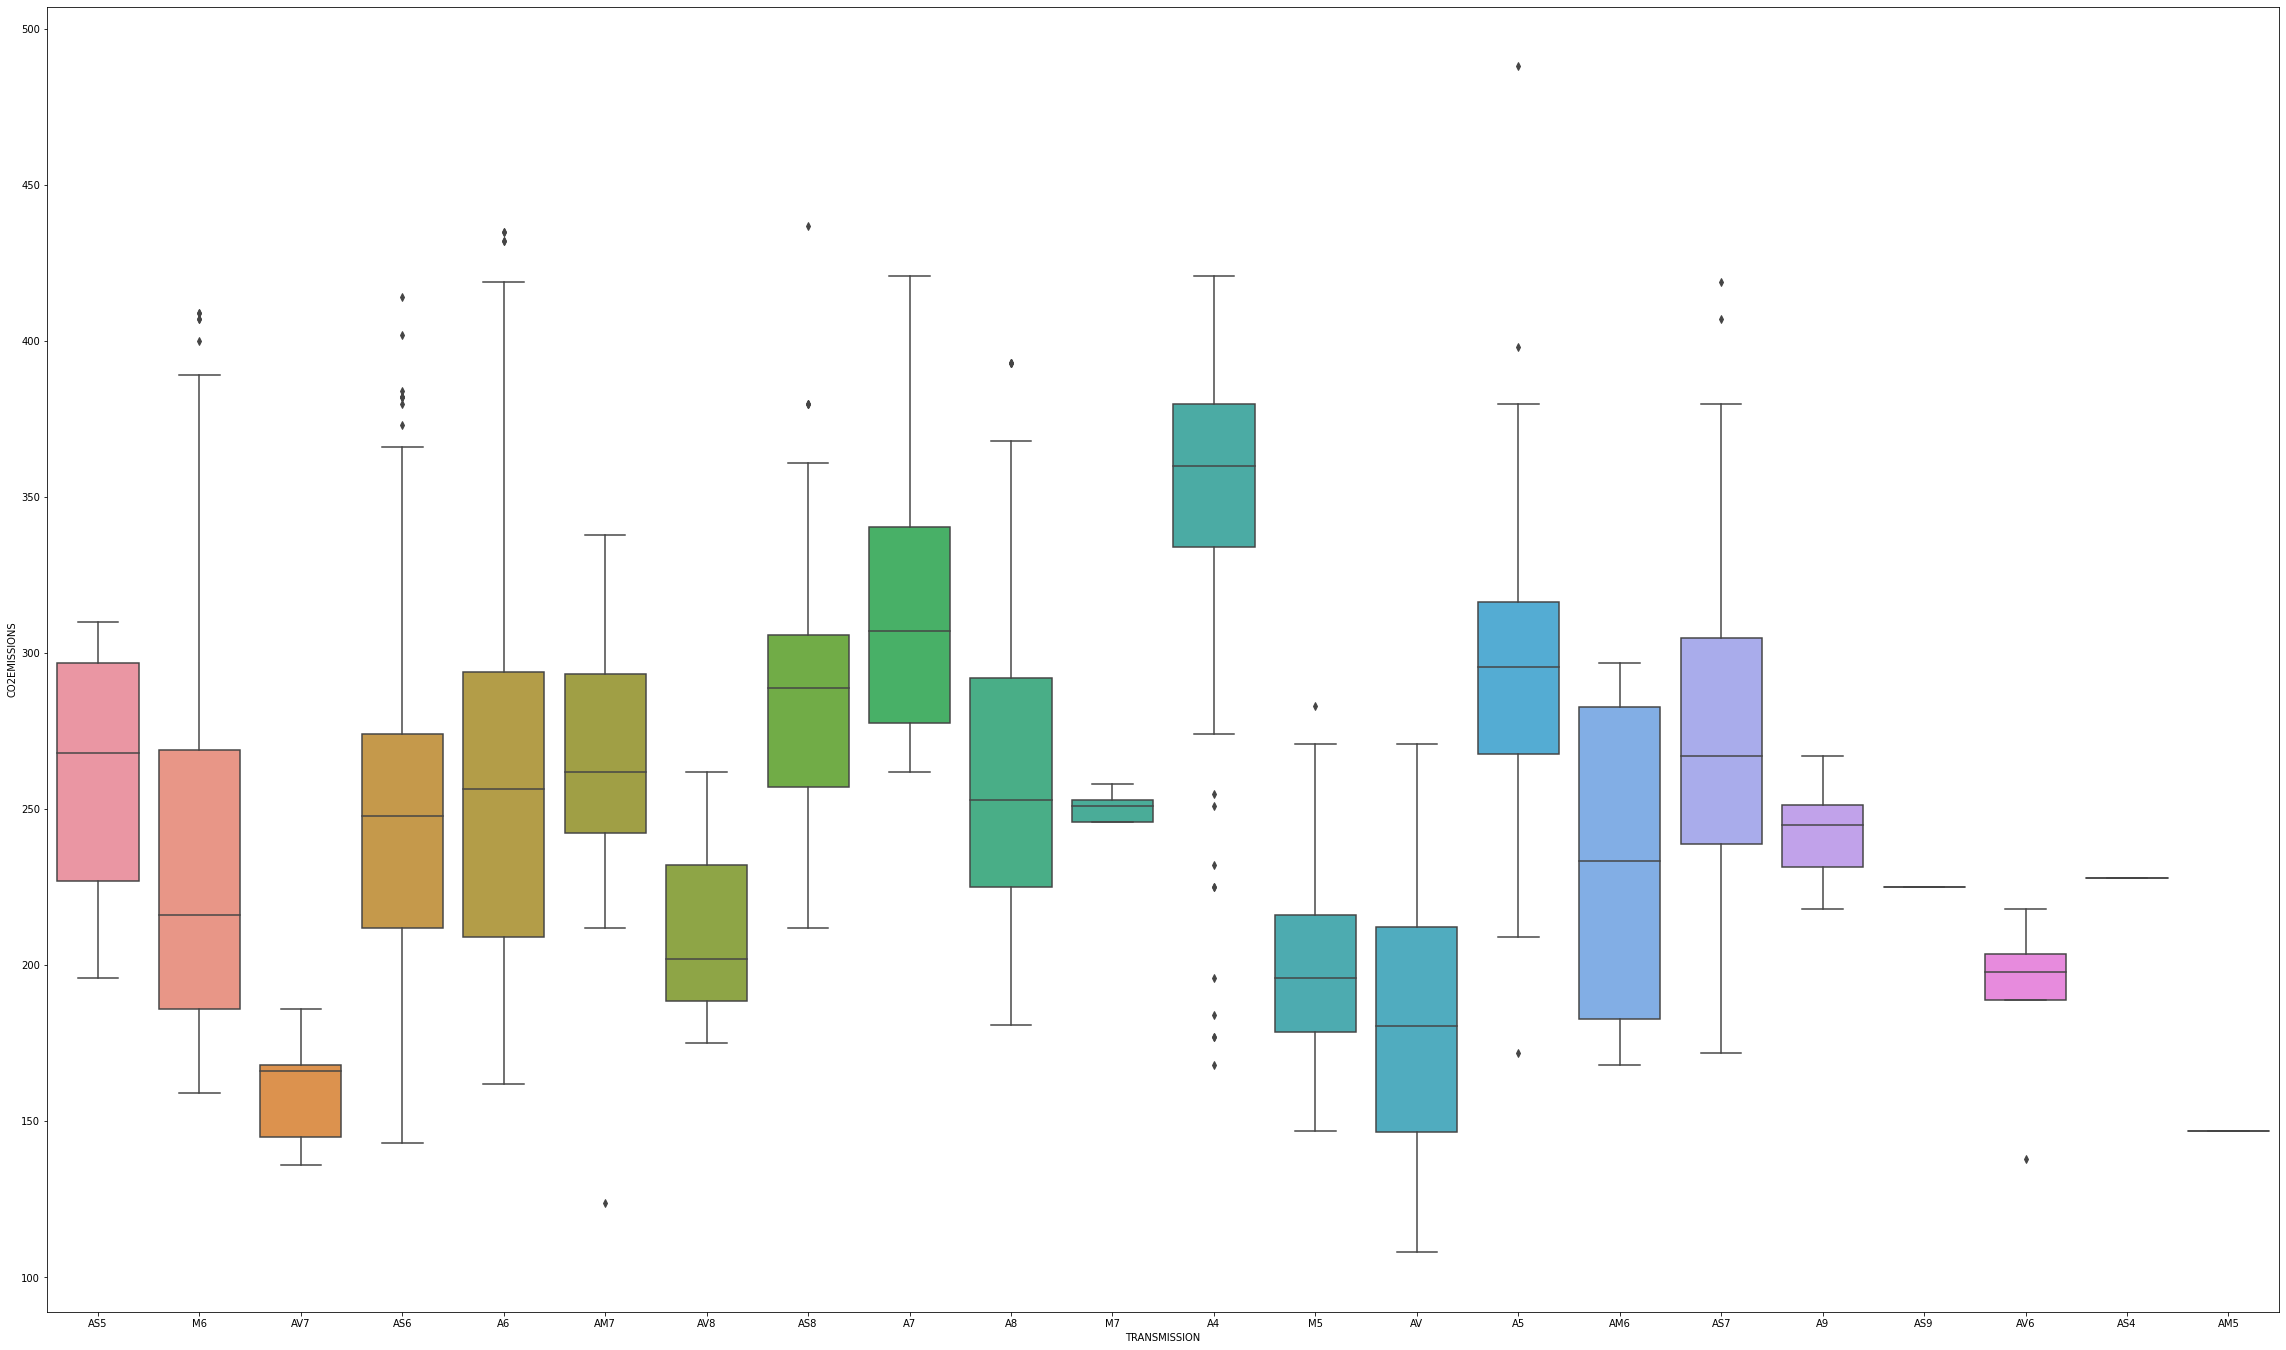

In [34]:
# TRANSMISSION VS EMISSION

plt.figure(figsize=(40, 24))
sns.boxplot(x = 'TRANSMISSION', y = 'CO2EMISSIONS', data = cars)
plt.show()

- Luxury vehicles like Aston Martin, Bently, Jaguar, Lamborghini, Rolls Royce have higher CO2 emissions

- Vans have higher CO2 emissions

- Generally as the No of cylinders increase CO2 emissions also increases

- E Fuel Type vehilces have higher CO2 emissions


In [35]:
# We dont need model hence we can remove it

cars.drop('MODEL',axis=1,inplace=True)

In [36]:
cars.head()

,MODELYEAR,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
cars['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [38]:
# We can drop MODEL YEAR as well since it has only one value

cars.drop('MODELYEAR',axis=1,inplace=True)

In [39]:
cars.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Creating Dummy Variables

In [41]:
dummy1 = pd.get_dummies(cars[['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']], drop_first=True) 


In [42]:
# Adding the results to the master dataframe
cars = pd.concat([cars, dummy1], axis=1)

In [43]:
cars.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,...,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Dropping MAKE, VEHICLECLASS, TRANSMISSION and FUELTYPE

cars.drop(['MAKE','VEHICLECLASS'],axis=1,inplace=True)

In [45]:
cars.drop(['TRANSMISSION','FUELTYPE'],axis=1,inplace=True)

In [46]:
cars.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,...,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Splitting Train adn Test Data

In [47]:
import sklearn
from sklearn.model_selection import train_test_split

In [48]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100) # Giving entire
                                                                    # Dataframe and creating two frames

print(df_train.shape)

print(df_test.shape)

(746, 84)
(321, 84)


# Scaling the variables

In [49]:
# Scaling the variables using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

In [50]:
# Instantiate the min max object

scaler = MinMaxScaler()

In [51]:
num_vars = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'] 

In [52]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [53]:
df_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,...,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,0.270270,0.333333,0.305882,0.237179,0.280952,0.312500,0.359788,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1044,0.108108,0.111111,0.207843,0.128205,0.180952,0.458333,0.232804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
590,0.135135,0.111111,0.215686,0.185897,0.204762,0.416667,0.261905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
330,0.351351,0.333333,0.372549,0.288462,0.342857,0.270833,0.439153,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
345,0.594595,0.555556,0.572549,0.628205,0.590476,0.104167,0.756614,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Building a Model using SKLEARN

In [54]:
# Dropping the predictor variable

y_train = df_train.pop('CO2EMISSIONS')
X_train = df_train

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.00456952e-02  2.69387768e-02 -4.23982643e-01 -1.95731547e-01
  1.59990999e+00 -2.06603068e-01  1.28042620e-02  1.30303077e-02
  3.08612793e-02  2.63510647e-03  1.05664558e-02  5.11647571e-03
  1.05846573e-02  1.94240342e-02  1.41977683e-02  9.02031962e-03
  1.09633346e-02  4.60835097e-03  9.15851991e-03  7.57569710e-03
 -2.84958265e-04  1.33096367e-02  6.91810666e-03  6.32363135e-03
  2.94001974e-02  9.13101099e-03  7.84633489e-03  9.28194747e-03
  2.19625563e-02  9.04517005e-03  2.69459637e-03  5.36846747e-03
  9.47720657e-03  1.71689731e-03 -3.37976599e-03  1.42840226e-02
  2.13364799e-02  7.74344023e-03  1.86796293e-02  2.41427720e-02
  3.20496691e-03  1.12105747e-02  4.51055125e-03  5.13094612e-03
 -1.42605869e-03 -1.00739056e-03 -2.17789264e-03 -2.20044493e-03
  3.47850512e-03  3.25928377e-03 -4.00434922e-03  2.11117875e-03
 -2.01684422e-03 -5.22449971e-03 -2.54230310e-03  5.43363179e-03
  3.45246774e-04  1.35012391e-02  1.44368300e-02  1.95308484e-02
  1.42504914e-02  1.01166

In [58]:
# Creating first MODEL with 20 Variables (RFE Technique)


# RFE with 20 features
lm = LinearRegression()
rfe1 = RFE(lm, 20)            

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

RFE(estimator=LinearRegression(), n_features_to_select=20)

[ True  True  True  True  True  True False False  True False False False
 False  True  True False False False False False False False False False
  True False False False  True False False False False False False  True
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False  True  True  True]
[ 1  1  1  1  1  1 22 25  1 52 27 49 28  1  1 43 30 51 34 44 63 26 45 46
  1 33 35 36  1 37 39 47 32 54  3  1  1 41  1  1 53 29 50 48 60 61 56 58
 40 24 42 38 59 31 57 23 62 20 21  7 11 12 15 19  1  5  4 64 17  9 10 16
 13  2 18  1 55  6  8 14  1  1  1]


In [59]:
# Getting the list of selected 20 variables

list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('ENGINESIZE', True, 1),
 ('CYLINDERS', True, 1),
 ('FUELCONSUMPTION_CITY', True, 1),
 ('FUELCONSUMPTION_HWY', True, 1),
 ('FUELCONSUMPTION_COMB', True, 1),
 ('FUELCONSUMPTION_COMB_MPG', True, 1),
 ('MAKE_ASTON MARTIN', False, 22),
 ('MAKE_AUDI', False, 25),
 ('MAKE_BENTLEY', True, 1),
 ('MAKE_BMW', False, 52),
 ('MAKE_BUICK', False, 27),
 ('MAKE_CADILLAC', False, 49),
 ('MAKE_CHEVROLET', False, 28),
 ('MAKE_CHRYSLER', True, 1),
 ('MAKE_DODGE', True, 1),
 ('MAKE_FIAT', False, 43),
 ('MAKE_FORD', False, 30),
 ('MAKE_GMC', False, 51),
 ('MAKE_HONDA', False, 34),
 ('MAKE_HYUNDAI', False, 44),
 ('MAKE_INFINITI', False, 63),
 ('MAKE_JAGUAR', False, 26),
 ('MAKE_JEEP', False, 45),
 ('MAKE_KIA', False, 46),
 ('MAKE_LAMBORGHINI', True, 1),
 ('MAKE_LAND ROVER', False, 33),
 ('MAKE_LEXUS', False, 35),
 ('MAKE_LINCOLN', False, 36),
 ('MAKE_MASERATI', True, 1),
 ('MAKE_MAZDA', False, 37),
 ('MAKE_MERCEDES-BENZ', False, 39),
 ('MAKE_MINI', False, 47),
 ('MAKE_MITSUBISHI', False, 32),
 ('MAKE_NISSA

In [60]:
# Selected 20 features in the model

col = X_train.columns[rfe1.support_]
col

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'MAKE_BENTLEY', 'MAKE_CHRYSLER',
       'MAKE_DODGE', 'MAKE_LAMBORGHINI', 'MAKE_MASERATI', 'MAKE_RAM',
       'MAKE_ROLLS-ROYCE', 'MAKE_SMART', 'MAKE_SRT', 'TRANSMISSION_AM5',
       'TRANSMISSION_AV7', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [61]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_MASERATI,MAKE_RAM,MAKE_ROLLS-ROYCE,MAKE_SMART,MAKE_SRT,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.305882,0.237179,0.280952,0.312500,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.207843,0.128205,0.180952,0.458333,0,0,0,0,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.215686,0.185897,0.204762,0.416667,0,0,0,0,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.372549,0.288462,0.342857,0.270833,0,0,1,0,0,0,0,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.572549,0.628205,0.590476,0.104167,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [62]:
# Fitting the model with 20 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6134.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:04:49   Log-Likelihood:                 2158.2
No. Observations:                 746   AIC:                            -4276.
Df Residuals:                     726   BIC:                            -4184.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,MAKE_SMART,inf
16,TRANSMISSION_AM5,inf
5,FUELCONSUMPTION_COMB,15505.47
3,FUELCONSUMPTION_CITY,6507.95
4,FUELCONSUMPTION_HWY,2053.44
0,const,283.57
19,FUELTYPE_X,12.90
20,FUELTYPE_Z,12.73
1,ENGINESIZE,12.32
2,CYLINDERS,11.53


In [66]:
# Removing MAKE_SMART and MAKE_SRT since they have highest P Value and hence are insignificant
X_train_new = X_train_rfe1.drop(['MAKE_SMART','MAKE_SRT'], axis=1)

In [67]:
# Creating a model with 18 of the remaining features

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train_new[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_MASERATI,MAKE_RAM,MAKE_ROLLS-ROYCE,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.305882,0.237179,0.280952,0.312500,0,0,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.207843,0.128205,0.180952,0.458333,0,0,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.215686,0.185897,0.204762,0.416667,0,0,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.372549,0.288462,0.342857,0.270833,0,0,1,0,0,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.572549,0.628205,0.590476,0.104167,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:
# Fitting the model with 18 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6459.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:06:54   Log-Likelihood:                 2156.8
No. Observations:                 746   AIC:                            -4276.
Df Residuals:                     727   BIC:                            -4188.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
# Checking the VIF for Model_2

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,FUELCONSUMPTION_COMB,15403.23
3,FUELCONSUMPTION_CITY,6471.05
4,FUELCONSUMPTION_HWY,2037.05
0,const,281.24
17,FUELTYPE_X,12.90
18,FUELTYPE_Z,12.72
1,ENGINESIZE,11.62
6,FUELCONSUMPTION_COMB_MPG,11.38
2,CYLINDERS,11.25
16,FUELTYPE_E,6.88


In [70]:
# Dropping FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY since they have the high p value and high VIF

X_train_new = X_train_rfe2.drop(['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'], axis=1)

In [71]:
# Creating 3rd Model with remaining 16 variables

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 16 selected columns
X_train_rfe3 = X_train_new[col1]

# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_MASERATI,MAKE_RAM,MAKE_ROLLS-ROYCE,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,0,1,0,0,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
# Fitting the model with 16 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7257.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:12:42   Log-Likelihood:                 2155.3
No. Observations:                 746   AIC:                            -4277.
Df Residuals:                     729   BIC:                            -4198.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
# Checking the VIF scores

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,231.77
3,FUELCONSUMPTION_COMB,17.42
15,FUELTYPE_X,12.74
16,FUELTYPE_Z,12.64
1,ENGINESIZE,11.61
2,CYLINDERS,10.98
4,FUELCONSUMPTION_COMB_MPG,10.18
14,FUELTYPE_E,6.85
11,MAKE_ROLLS-ROYCE,1.18
5,MAKE_BENTLEY,1.11


In [74]:
# Dropping MAKE_ROLLS-ROYCE since it has highest p-value

X_train_new = X_train_rfe3.drop(['MAKE_ROLLS-ROYCE'], axis=1)

In [75]:
# Creating 4th Model with 15 variables

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 15 selected columns
X_train_rfe4 = X_train_new[col1]

# Add a constant to the model
X_train_rfe4 = sm.add_constant(X_train_rfe4)
X_train_rfe4.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_MASERATI,MAKE_RAM,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,0,1,0,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,0,0,0,1,0


In [76]:
# Fitting the model with 15 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7733.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:14:23   Log-Likelihood:                 2154.4
No. Observations:                 746   AIC:                            -4277.
Df Residuals:                     730   BIC:                            -4203.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [77]:
# Checking the VIF Scores

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,229.69
3,FUELCONSUMPTION_COMB,17.42
14,FUELTYPE_X,12.73
15,FUELTYPE_Z,12.63
1,ENGINESIZE,11.26
4,FUELCONSUMPTION_COMB_MPG,10.11
2,CYLINDERS,9.85
13,FUELTYPE_E,6.85
5,MAKE_BENTLEY,1.09
6,MAKE_CHRYSLER,1.08


In [78]:
# Dropping MAKE_MASERATI since it has highest P value

X_train_new = X_train_rfe4.drop(['MAKE_MASERATI'], axis=1)

In [79]:
# Creating 5th Model with 14 Variables

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe5 = X_train_new[col1]

# Add a constant to the model
X_train_rfe5 = sm.add_constant(X_train_rfe5)
X_train_rfe5.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,0,1,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,0,0,1,0


In [80]:
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8279.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:19:41   Log-Likelihood:                 2153.6
No. Observations:                 746   AIC:                            -4277.
Df Residuals:                     731   BIC:                            -4208.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,229.69
3,FUELCONSUMPTION_COMB,17.33
13,FUELTYPE_X,12.72
14,FUELTYPE_Z,12.63
1,ENGINESIZE,11.08
4,FUELCONSUMPTION_COMB_MPG,10.11
2,CYLINDERS,9.80
12,FUELTYPE_E,6.83
5,MAKE_BENTLEY,1.09
6,MAKE_CHRYSLER,1.08


In [96]:
# Removing ENGINESIZE since it has high P value and high VIF

X_train_new = X_train_rfe5.drop(['ENGINESIZE'], axis=1)

In [82]:
# Creating 6th Model with 13 variables

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 13 selected columns
X_train_rfe6 = X_train_new[col1]

# Add a constant to the model
X_train_rfe6 = sm.add_constant(X_train_rfe6)
X_train_rfe6.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_BENTLEY,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,0,1,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,0,0,1,0


In [83]:
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8279.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:20:51   Log-Likelihood:                 2153.6
No. Observations:                 746   AIC:                            -4277.
Df Residuals:                     731   BIC:                            -4208.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,229.69
3,FUELCONSUMPTION_COMB,17.33
13,FUELTYPE_X,12.72
14,FUELTYPE_Z,12.63
1,ENGINESIZE,11.08
4,FUELCONSUMPTION_COMB_MPG,10.11
2,CYLINDERS,9.80
12,FUELTYPE_E,6.83
5,MAKE_BENTLEY,1.09
6,MAKE_CHRYSLER,1.08


In [85]:
# Removing MAKE_BENTLEY as it has highest P value

X_train_new = X_train_rfe6.drop(['MAKE_BENTLEY'], axis=1)

In [86]:
# Creating 8th Model after removing MAKE_BENTLEY

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe7 = X_train_new[col1]

# Add a constant to the model
X_train_rfe7 = sm.add_constant(X_train_rfe7)
X_train_rfe7.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,TRANSMISSION_AM5,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,0,1,0


In [87]:
lm7 = sm.OLS(y_train, X_train_rfe7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8893.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:23:46   Log-Likelihood:                 2152.1
No. Observations:                 746   AIC:                            -4276.
Df Residuals:                     732   BIC:                            -4212.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [88]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.75
3,FUELCONSUMPTION_COMB,17.28
12,FUELTYPE_X,12.72
13,FUELTYPE_Z,12.63
1,ENGINESIZE,10.82
4,FUELCONSUMPTION_COMB_MPG,10.08
2,CYLINDERS,9.33
11,FUELTYPE_E,6.82
5,MAKE_CHRYSLER,1.08
6,MAKE_DODGE,1.08


In [89]:
# Dropping TRANSMISSION_AV7 since it has highest P Value

X_train_new = X_train_rfe7.drop(['TRANSMISSION_AV7'], axis=1)

In [90]:
# Creating 8th Model after removing TRANSMISSION_AV7

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe8 = X_train_new[col1]

# Add a constant to the model
X_train_rfe8 = sm.add_constant(X_train_rfe8)
X_train_rfe8.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,TRANSMISSION_AM5,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,1,0


In [91]:
lm8 = sm.OLS(y_train, X_train_rfe8).fit()   
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9612.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:25:05   Log-Likelihood:                 2150.8
No. Observations:                 746   AIC:                            -4276.
Df Residuals:                     733   BIC:                            -4216.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,224.80
3,FUELCONSUMPTION_COMB,17.14
11,FUELTYPE_X,12.71
12,FUELTYPE_Z,12.60
1,ENGINESIZE,10.82
4,FUELCONSUMPTION_COMB_MPG,9.84
2,CYLINDERS,9.33
10,FUELTYPE_E,6.82
5,MAKE_CHRYSLER,1.08
6,MAKE_DODGE,1.08


In [93]:
# Dropping TRANSMISSION_AM5 since it has highest P Value

X_train_new = X_train_rfe7.drop(['TRANSMISSION_AM5'], axis=1)

In [94]:
# Creating 9th Model after removing TRANSMISSION_AM5

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe9 = X_train_new[col1]

# Add a constant to the model
X_train_rfe9 = sm.add_constant(X_train_rfe9)
X_train_rfe9.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,TRANSMISSION_AV7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,0,1,0


In [95]:
lm9 = sm.OLS(y_train, X_train_rfe9).fit()   
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9608.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:26:23   Log-Likelihood:                 2150.6
No. Observations:                 746   AIC:                            -4275.
Df Residuals:                     733   BIC:                            -4215.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [96]:
# Dropping TRANSMISSION_AV7 since it has highest P Value

X_train_new = X_train_rfe9.drop(['TRANSMISSION_AV7'], axis=1)

In [97]:
# Creating 10th Model

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe10 = X_train_new[col1]

# Add a constant to the model
X_train_rfe10 = sm.add_constant(X_train_rfe10)
X_train_rfe10.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,MAKE_RAM,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,0,1,0


In [98]:
lm10 = sm.OLS(y_train, X_train_rfe10).fit()   
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:27:26   Log-Likelihood:                 2149.4
No. Observations:                 746   AIC:                            -4275.
Df Residuals:                     734   BIC:                            -4219.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [99]:
# Chekcing VIF Scores

vif = pd.DataFrame()
X = X_train_rfe10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,221.13
3,FUELCONSUMPTION_COMB,16.94
10,FUELTYPE_X,12.71
11,FUELTYPE_Z,12.56
1,ENGINESIZE,10.82
4,FUELCONSUMPTION_COMB_MPG,9.61
2,CYLINDERS,9.32
9,FUELTYPE_E,6.82
6,MAKE_DODGE,1.08
5,MAKE_CHRYSLER,1.07


In [100]:
# Dropping MAKE_RAM since it has highest P Value

X_train_new = X_train_rfe10.drop(['MAKE_RAM'], axis=1)

In [101]:
# Creating 11th Model

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe11 = X_train_new[col1]

# Add a constant to the model
X_train_rfe11 = sm.add_constant(X_train_rfe11)
X_train_rfe11.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,MAKE_LAMBORGHINI,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,0,1,0


In [102]:
lm11 = sm.OLS(y_train, X_train_rfe11).fit()   
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:28:09   Log-Likelihood:                 2148.0
No. Observations:                 746   AIC:                            -4274.
Df Residuals:                     735   BIC:                            -4223.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [103]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,218.20
3,FUELCONSUMPTION_COMB,16.83
9,FUELTYPE_X,12.66
10,FUELTYPE_Z,12.45
1,ENGINESIZE,10.80
4,FUELCONSUMPTION_COMB_MPG,9.52
2,CYLINDERS,9.32
8,FUELTYPE_E,6.82
6,MAKE_DODGE,1.08
5,MAKE_CHRYSLER,1.07


In [104]:
# Dropping MAKE_LAM since it has highest P Value

X_train_new = X_train_rfe11.drop(['MAKE_LAMBORGHINI'], axis=1)

In [105]:
# Creating 12th Model

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe12 = X_train_new[col1]

# Add a constant to the model
X_train_rfe12 = sm.add_constant(X_train_rfe12)
X_train_rfe12.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.280952,0.312500,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.180952,0.458333,0,0,0,1,0
590,1.0,0.135135,0.111111,0.204762,0.416667,0,0,0,1,0
330,1.0,0.351351,0.333333,0.342857,0.270833,0,1,0,1,0
345,1.0,0.594595,0.555556,0.590476,0.104167,0,0,0,1,0


In [106]:
lm12 = sm.OLS(y_train, X_train_rfe12).fit()   
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:29:08   Log-Likelihood:                 2146.0
No. Observations:                 746   AIC:                            -4272.
Df Residuals:                     736   BIC:                            -4226.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [107]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,217.02
3,FUELCONSUMPTION_COMB,16.70
8,FUELTYPE_X,12.66
9,FUELTYPE_Z,12.45
1,ENGINESIZE,10.52
4,FUELCONSUMPTION_COMB_MPG,9.48
2,CYLINDERS,9.00
7,FUELTYPE_E,6.81
6,MAKE_DODGE,1.08
5,MAKE_CHRYSLER,1.07


In [108]:
# Dropping FUELCONSUMPTION_COMB since it has highest p value

X_train_new = X_train_rfe12.drop(['FUELCONSUMPTION_COMB'], axis=1)

In [109]:
# Creating 13th Model 

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe13 = X_train_new[col1]

# Add a constant to the model
X_train_rfe13 = sm.add_constant(X_train_rfe13)
X_train_rfe13.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.312500,0,0,0,0,1
1044,1.0,0.108108,0.111111,0.458333,0,0,0,1,0
590,1.0,0.135135,0.111111,0.416667,0,0,0,1,0
330,1.0,0.351351,0.333333,0.270833,0,1,0,1,0
345,1.0,0.594595,0.555556,0.104167,0,0,0,1,0


In [110]:
lm13 = sm.OLS(y_train, X_train_rfe13).fit()   
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1252.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:30:12   Log-Likelihood:                 1261.5
No. Observations:                 746   AIC:                            -2505.
Df Residuals:                     737   BIC:                            -2463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [111]:
# Checking the VIF Scores

vif = pd.DataFrame()
X = X_train_rfe13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.78
7,FUELTYPE_X,12.64
8,FUELTYPE_Z,12.44
1,ENGINESIZE,9.82
2,CYLINDERS,8.86
6,FUELTYPE_E,5.47
3,FUELCONSUMPTION_COMB_MPG,3.67
4,MAKE_CHRYSLER,1.03
5,MAKE_DODGE,1.03


In [112]:
# Dropping FUELTYPE_x since it has high VIF

X_train_new = X_train_rfe13.drop(['FUELTYPE_X'], axis=1)

In [113]:
# Creating 14th Model

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe14 = X_train_new[col1]

# Add a constant to the model
X_train_rfe14 = sm.add_constant(X_train_rfe14)
X_train_rfe14.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,FUELTYPE_E,FUELTYPE_Z
109,1.0,0.270270,0.333333,0.312500,0,0,0,1
1044,1.0,0.108108,0.111111,0.458333,0,0,0,0
590,1.0,0.135135,0.111111,0.416667,0,0,0,0
330,1.0,0.351351,0.333333,0.270833,0,1,0,0
345,1.0,0.594595,0.555556,0.104167,0,0,0,0


In [114]:
lm14 = sm.OLS(y_train, X_train_rfe14).fit()   
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1351.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:31:27   Log-Likelihood:                 1241.1
No. Observations:                 746   AIC:                            -2466.
Df Residuals:                     738   BIC:                            -2429.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [115]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.13
1,ENGINESIZE,9.81
2,CYLINDERS,8.79
3,FUELCONSUMPTION_COMB_MPG,3.57
6,FUELTYPE_E,1.44
7,FUELTYPE_Z,1.25
4,MAKE_CHRYSLER,1.03
5,MAKE_DODGE,1.03


In [116]:
# Removing ENGINESIZE since it has high VIF

X_train_new = X_train_rfe14.drop(['ENGINESIZE'], axis=1)

In [117]:
# Creating 15th Model

# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe2
col1 = X_train_new.columns

# Subsetting training data for 10 selected columns
X_train_rfe15 = X_train_new[col1]

# Add a constant to the model
X_train_rfe15 = sm.add_constant(X_train_rfe15)
X_train_rfe15.head()

,const,CYLINDERS,FUELCONSUMPTION_COMB_MPG,MAKE_CHRYSLER,MAKE_DODGE,FUELTYPE_E,FUELTYPE_Z
109,1.0,0.333333,0.312500,0,0,0,1
1044,1.0,0.111111,0.458333,0,0,0,0
590,1.0,0.111111,0.416667,0,0,0,0
330,1.0,0.333333,0.270833,0,1,0,0
345,1.0,0.555556,0.104167,0,0,0,0


In [118]:
lm15 = sm.OLS(y_train, X_train_rfe15).fit()   
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:32:22   Log-Likelihood:                 1217.9
No. Observations:                 746   AIC:                            -2422.
Df Residuals:                     739   BIC:                            -2390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [119]:
# Checking VIF Scores

vif = pd.DataFrame()
X = X_train_rfe15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.18
2,FUELCONSUMPTION_COMB_MPG,3.09
1,CYLINDERS,2.73
5,FUELTYPE_E,1.43
6,FUELTYPE_Z,1.21
3,MAKE_CHRYSLER,1.03
4,MAKE_DODGE,1.03


In [122]:
# Since the model looks ok to move ahead 

In [123]:


lr = sm.OLS(y_train, X_train_rfe15)

# Fitting the model

lr_model = lr.fit()    # Fit is applied only to TRAIN Data and Never on Test Data

# Getting the model parameters

lr_model.params

const                       0.605711
CYLINDERS                   0.261947
FUELCONSUMPTION_COMB_MPG   -0.851101
MAKE_CHRYSLER              -0.051225
MAKE_DODGE                 -0.037299
FUELTYPE_E                 -0.141880
FUELTYPE_Z                 -0.027135
dtype: float64

In [124]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:34:29   Log-Likelihood:                 1217.9
No. Observations:                 746   AIC:                            -2422.
Df Residuals:                     739   BIC:                            -2390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [125]:
# Now coming back to VIF again


vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,const,36.18
2,FUELCONSUMPTION_COMB_MPG,3.09
1,CYLINDERS,2.73
5,FUELTYPE_E,1.43
6,FUELTYPE_Z,1.21
3,MAKE_CHRYSLER,1.03
4,MAKE_DODGE,1.03


In [128]:
# PRedicting the y values on traning dataset

y_train_pred = lr_model.predict(X_train_rfe15)

y_train_pred

109     0.399923
1044    0.244728
590     0.280191
330     0.425222
345     0.662581
          ...   
802     0.199863
53      0.546790
350     0.680312
79      0.085147
792     0.199863
Length: 746, dtype: float64

In [129]:
# Calculating the residual

res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Errors')

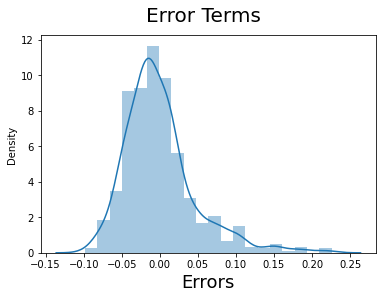

In [130]:
# Plotting the distribution plot for residual



fig = plt.figure()

sns.distplot((res), bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 

plt.xlabel('Errors', fontsize = 18)                         # X-label

In [131]:
# Since the error terms are normally distributed the Assumptions of regression hold good

In [132]:
# Applying scaling on the test data set

num_vars = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'] 

df_test[num_vars] = scaler.transform(df_test[num_vars]) 

In [133]:
y_test = df_test.pop('CO2EMISSIONS')

X_test = df_test

In [134]:
# Add a constant to X_test 

X_test_sm = sm.add_constant(X_test)

X_test_sm.head()

,const,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,...,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
849,1.0,0.337838,0.333333,0.333333,0.333333,0.333333,0.270833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
244,1.0,0.581081,0.555556,0.400000,0.365385,0.390476,0.229167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30,1.0,0.270270,0.333333,0.329412,0.250000,0.304762,0.291667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
306,1.0,0.635135,0.555556,0.447059,0.326923,0.409524,0.208333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
240,1.0,0.581081,0.555556,0.580392,0.564103,0.576190,0.125000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
X_test_sm.columns

Index(['const', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'MAKE_ASTON MARTIN', 'MAKE_AUDI',
       'MAKE_BENTLEY', 'MAKE_BMW', 'MAKE_BUICK', 'MAKE_CADILLAC',
       'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DODGE', 'MAKE_FIAT',
       'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI', 'MAKE_INFINITI',
       'MAKE_JAGUAR', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LAMBORGHINI',
       'MAKE_LAND ROVER', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MASERATI',
       'MAKE_MAZDA', 'MAKE_MERCEDES-BENZ', 'MAKE_MINI', 'MAKE_MITSUBISHI',
       'MAKE_NISSAN', 'MAKE_PORSCHE', 'MAKE_RAM', 'MAKE_ROLLS-ROYCE',
       'MAKE_SCION', 'MAKE_SMART', 'MAKE_SRT', 'MAKE_SUBARU', 'MAKE_TOYOTA',
       'MAKE_VOLKSWAGEN', 'MAKE_VOLVO', 'VEHICLECLASS_FULL-SIZE',
       'VEHICLECLASS_MID-SIZE', 'VEHICLECLASS_MINICOMPACT',
       'VEHICLECLASS_MINIVAN', 'VEHICLECLASS_PICKUP TRUCK - SMALL',
       'VEHICLECLASS_PICKUP TRUCK - STAN

In [136]:
X_train_rfe15.columns

Index(['const', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG', 'MAKE_CHRYSLER',
       'MAKE_DODGE', 'FUELTYPE_E', 'FUELTYPE_Z'],
      dtype='object')

In [137]:
# Dropping variables which are not part of the model

X_test_sm = X_test_sm.drop(['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','MAKE_ASTON MARTIN', 'MAKE_AUDI',
       'MAKE_BENTLEY', 'MAKE_BMW', 'MAKE_BUICK', 'MAKE_CADILLAC',
       'MAKE_CHEVROLET' ,'MAKE_DODGE', 'MAKE_FIAT',
       'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI', 'MAKE_INFINITI',
       'MAKE_JAGUAR', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LAMBORGHINI',
       'MAKE_LAND ROVER', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MASERATI',
       'MAKE_MAZDA', 'MAKE_MERCEDES-BENZ', 'MAKE_MINI', 'MAKE_MITSUBISHI',
       'MAKE_NISSAN', 'MAKE_PORSCHE', 'MAKE_RAM', 'MAKE_ROLLS-ROYCE',
       'MAKE_SCION', 'MAKE_SMART', 'MAKE_SRT', 'MAKE_SUBARU', 'MAKE_TOYOTA',
       'MAKE_VOLKSWAGEN', 'MAKE_VOLVO','VEHICLECLASS_FULL-SIZE',
       'VEHICLECLASS_MID-SIZE', 'VEHICLECLASS_MINICOMPACT',
       'VEHICLECLASS_MINIVAN', 'VEHICLECLASS_PICKUP TRUCK - SMALL',
       'VEHICLECLASS_PICKUP TRUCK - STANDARD',
       'VEHICLECLASS_SPECIAL PURPOSE VEHICLE',
       'VEHICLECLASS_STATION WAGON - MID-SIZE',
       'VEHICLECLASS_STATION WAGON - SMALL', 'VEHICLECLASS_SUBCOMPACT',
       'VEHICLECLASS_SUV - SMALL', 'VEHICLECLASS_SUV - STANDARD',
       'VEHICLECLASS_TWO-SEATER', 'VEHICLECLASS_VAN - CARGO',
       'VEHICLECLASS_VAN - PASSENGER','TRANSMISSION_A5', 'TRANSMISSION_A6',
       'TRANSMISSION_A7', 'TRANSMISSION_A8', 'TRANSMISSION_A9',
       'TRANSMISSION_AM5', 'TRANSMISSION_AM6', 'TRANSMISSION_AM7',
       'TRANSMISSION_AS4', 'TRANSMISSION_AS5', 'TRANSMISSION_AS6',
       'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AS9',
       'TRANSMISSION_AV', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7',
       'TRANSMISSION_AV8', 'TRANSMISSION_M5', 'TRANSMISSION_M6',
       'TRANSMISSION_M7', 'FUELTYPE_X'],axis = 1)

In [138]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm = sm.OLS(y_test,X_test_sm).fit()

In [139]:
# Making predictions
y_test_pred = lm.predict(X_test_sm)

Text(0.5, 0.98, 'y_test vs y_test_pred')

Text(0.5, 0, 'y_test')

Text(0, 0.5, 'y_pred')

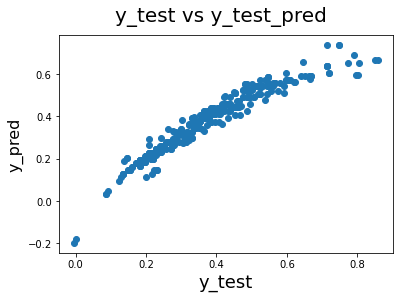

In [140]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [141]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          5.61e-168
Time:                        20:37:00   Log-Likelihood:                 531.22
No. Observations:                 321   AIC:                            -1050.
Df Residuals:                     315   BIC:                            -1028.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

 **Co2 Emission = 0.58 + 0.29 * CYLINDERS - 0.78 * FUELCONSUMPTION_COMB_MPG - 0.03 * MAKE_CHRYSLER - 0.14 * FUELTYPE_E - 0.03 * FUELTYPE_Z**